In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

In /home/piyush/.conda/envs/kaggle/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/piyush/.conda/envs/kaggle/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/piyush/.conda/envs/kaggle/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/piyush/.conda/envs/kaggle/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/piyush/.conda/e

In [2]:
data_dir = "../data/healthcare/"
train = pd.read_csv(data_dir + "train_data.csv")
test = pd.read_csv(data_dir + "test_data.csv")

train.shape, test.shape

((318438, 18), (137057, 17))

In [3]:
train.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

#### Target class - Bed Grade

In [4]:
target = 'Bed Grade'
length = len(train)
train[target].unique(), train[target].isna().sum()/length*100

(array([ 2.,  3.,  4.,  1., nan]), 0.035485714644609)

In [5]:
# fill nan values according to probability
probs = OrderedDict()
for key in train[target].unique():
    if pd.isnull(key):
        continue
    probs[key] = (train[target]==key).sum()/length

print(probs)
probs[3.0] += (1-sum(list(probs.values())))  # minute difference

def fill_nan(x):
    if pd.isnull(x):
        return np.random.choice(list(probs.keys()), p=list(probs.values()))
    return x

train[target] = train[target].apply(fill_nan)

train[target].unique(), train[target].isna().sum()/length*100

OrderedDict([(2.0, 0.3883675943197734), (3.0, 0.3472669719066192), (4.0, 0.18077616364881074), (1.0, 0.08323441297835057)])


(array([2., 3., 4., 1.]), 0.0)

/home/piyush/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Bed Grade', ylabel='count'>

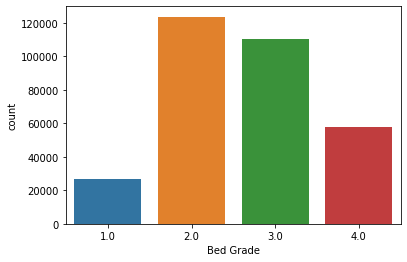

In [6]:
sns.countplot(train[target])  # unbalanced dataset

In [7]:
train.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                               0
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [8]:
test.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                              35
patientid                               0
City_Code_Patient                    2157
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
dtype: int64

In [9]:
# Dropping test rows where target is nan
test = test[test[target].notna()]
test.reset_index(drop=True, inplace=True)
y_test = test[target]

# Dropping unrelated columns
# ids are unrelated, location of patient should also be unrelated
train.drop(['Stay', 'case_id', 'patientid', 'City_Code_Patient'], axis=1, inplace=True)
test.drop([target, 'case_id', 'patientid', 'City_Code_Patient'], axis=1, inplace=True)

In [10]:
def plot_feature(feature):
    df_plot = train.groupby([target, feature]).size().reset_index().pivot(columns=target, index=feature, values=0)
    df_plot.plot(kind='bar', stacked=True)

32

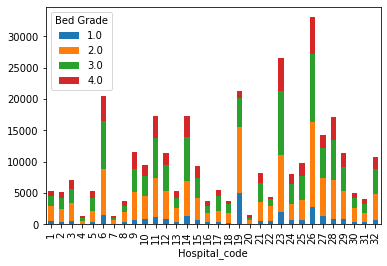

In [11]:
plot_feature('Hospital_code')
train['Hospital_code'].nunique()  # categorical

7

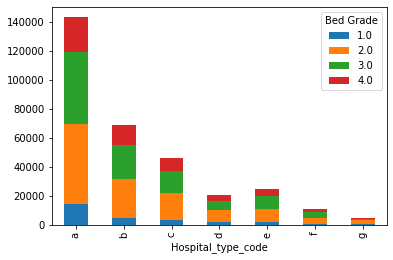

In [12]:
plot_feature('Hospital_type_code')
train['Hospital_type_code'].nunique()  # categorical

11

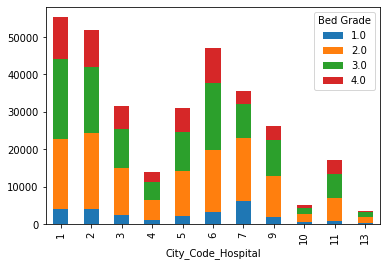

In [13]:
plot_feature('City_Code_Hospital')
train['City_Code_Hospital'].nunique()  # categorical

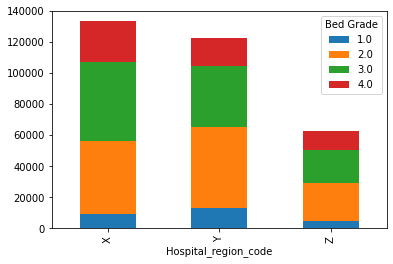

In [14]:
plot_feature('Hospital_region_code')  # categorical

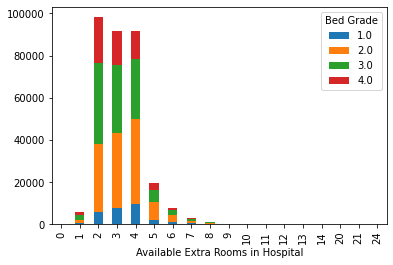

In [15]:
plot_feature('Available Extra Rooms in Hospital')  # regression
# train['Available Extra Rooms in Hospital'], bins = pd.qcut(
#     train['Available Extra Rooms in Hospital'], 4, labels=[f"rooms_{i}" for i in range(4)], retbins=True)  # 4 bins
# plot_feature('Available Extra Rooms in Hospital')  # categorical
# test['Available Extra Rooms in Hospital'] = pd.cut(test['Available Extra Rooms in Hospital'], bins)

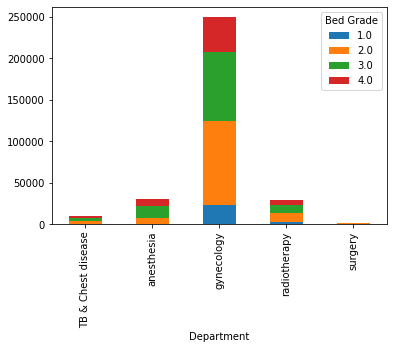

In [16]:
plot_feature('Department')  # categorical

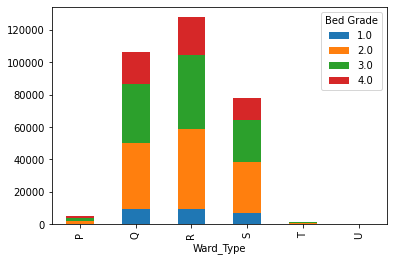

In [17]:
plot_feature('Ward_Type')  # categorical

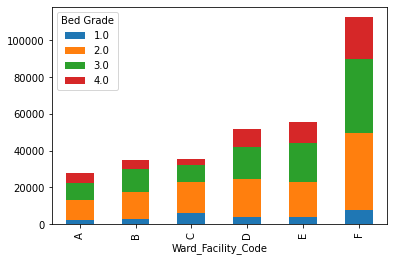

In [18]:
plot_feature('Ward_Facility_Code')  # categorical

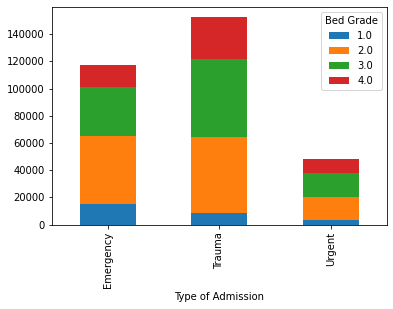

In [19]:
plot_feature('Type of Admission')  # categorical

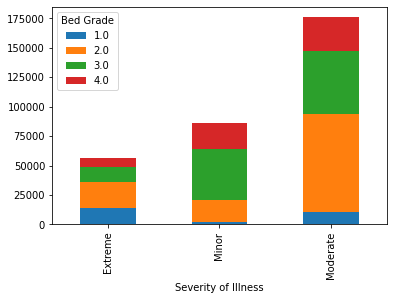

In [20]:
plot_feature('Severity of Illness')  # categorical

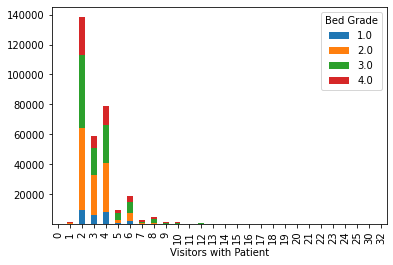

In [21]:
plot_feature('Visitors with Patient')  # regression
# train['Visitors with Patient'], bins = pd.qcut(
#     train['Visitors with Patient'], 4, labels=[f"visitors_{i}" for i in range(4)], retbins=True)  # 4 bins
# plot_feature('Visitors with Patient')  # categorical
# test['Visitors with Patient'] = pd.cut(test['Visitors with Patient'], bins)

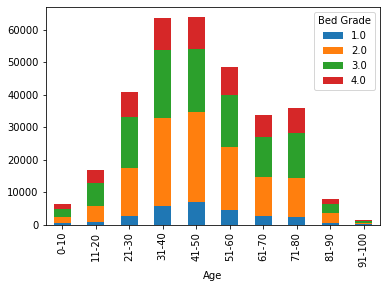

In [22]:
plot_feature('Age')  # categorical

/home/piyush/.local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Admission_Deposit', ylabel='Density'>

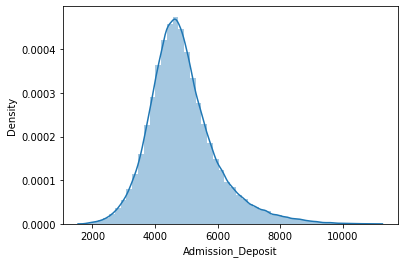

In [23]:
sns.distplot(train['Admission_Deposit'])  # regression
# train['Admission_Deposit'], bins = pd.qcut(
#     train['Admission_Deposit'], 4, labels=[f"deposit_{i}" for i in range(4)], retbins=True)  # 4 bins
# plot_feature('Admission_Deposit')  # categorical
# test['Admission_Deposit'] = pd.cut(test['Admission_Deposit'], bins)

None of the features seems to have any relation with the target class (individually) excpet a few. Let's calculate accuracy based on random chance and try to find if some model beats it.

In [24]:
y_pred = np.random.choice(list(probs.keys()), size=len(test), p=list(probs.values()))
accuracy_score(y_test.values, y_pred)

0.30786297090978093

In [25]:
test.isnull().sum()

Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
dtype: int64

In [26]:
# OneHotEncoding of categorical features (almostall features)
for feature in ['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital', 'Hospital_region_code',
               'Department', 'Ward_Type', 'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age']:
    encoder = OneHotEncoder()
    
    transformed = encoder.fit_transform(train[feature].to_numpy().reshape(-1, 1))
    ohe_df = pd.DataFrame(transformed.todense(), columns=feature + encoder.get_feature_names())
    train = pd.concat([train, ohe_df], axis=1).drop([feature], axis=1)
    
    transformed = encoder.transform(test[feature].to_numpy().reshape(-1, 1))
    ohe_df = pd.DataFrame(transformed.todense(), columns=feature + encoder.get_feature_names())
    test = pd.concat([test, ohe_df], axis=1).drop([feature], axis=1)

/home/piyush/.conda/envs/kaggle/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/piyush/.conda/envs/kaggle/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "

In [27]:
train.shape, test.shape

((318438, 90), (137022, 89))

In [28]:
y_train = train[target]
train.drop([target,], axis=1, inplace=True)

In [29]:
classifier = DecisionTreeClassifier()
classifier.fit(train.values, y_train)
pred_train = classifier.predict(train.values)
accuracy_score(y_train.values, pred_train)

0.9975442629334439

In [30]:
pred_test = classifier.predict(test.values)
accuracy_score(y_test.values, pred_test)

0.3813840113266483

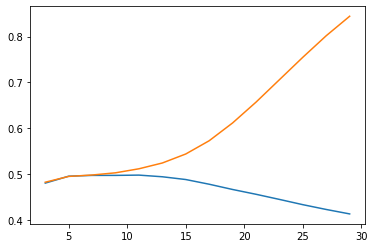

In [31]:
# Overfitting..
# Hence, limiting depth
train_acc = []
test_acc = []
for depth in range(3, 30, 2):
    classifier = DecisionTreeClassifier(max_depth=depth)
    classifier.fit(train.values, y_train)
    pred_train = classifier.predict(train.values)
    train_acc.append(accuracy_score(y_train.values, pred_train))
    
    pred_test = classifier.predict(test.values)
    test_acc.append(accuracy_score(y_test.values, pred_test))
    
plt.plot(range(3, 30, 2), test_acc)
plt.plot(range(3, 30, 2), train_acc)

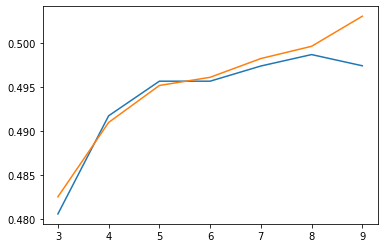

In [32]:
# Zoomed-in
train_acc = []
test_acc = []
for depth in range(3, 10, 1):
    classifier = DecisionTreeClassifier(max_depth=depth)
    classifier.fit(train.values, y_train)
    pred_train = classifier.predict(train.values)
    train_acc.append(accuracy_score(y_train.values, pred_train))
    
    pred_test = classifier.predict(test.values)
    test_acc.append(accuracy_score(y_test.values, pred_test))
    
plt.plot(range(3, 10, 1), test_acc)
plt.plot(range(3, 10, 1), train_acc)

In [33]:
"Accuracy", max(test_acc), "at 8"

('Accuracy', 0.4986863423391864, 'at 8')